<a href="https://colab.research.google.com/github/menna03/Disease-Symptom-Prediction/blob/main/Disease_Symptom_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

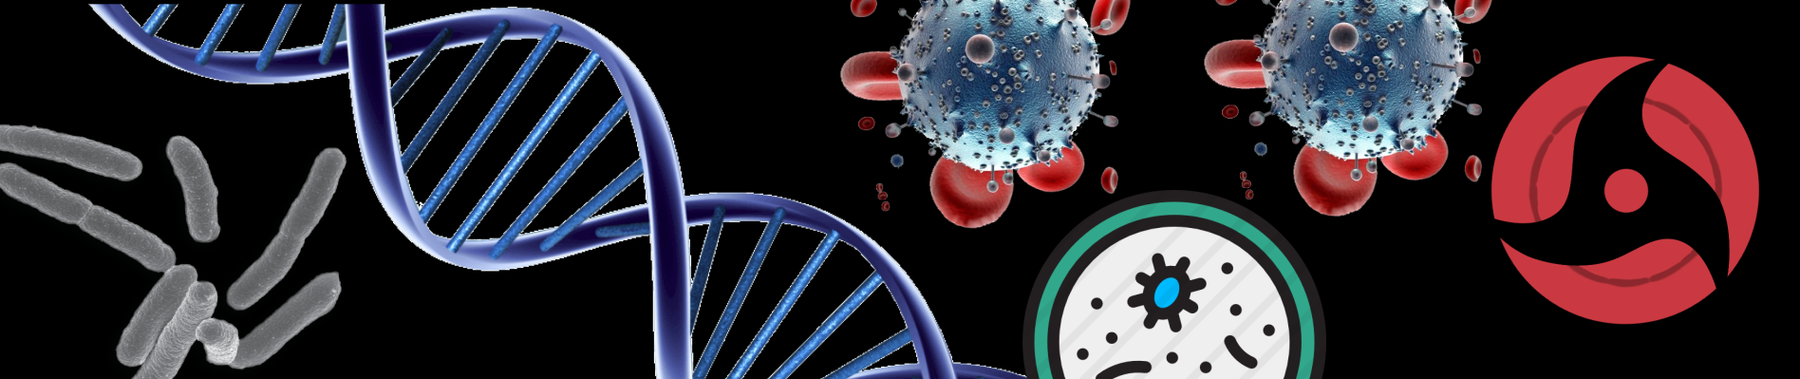

# Disease Symptom Analysis with Association Rules

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Function to load data from a CSV file into a list of transactions
def load_data_from_csv(file_path):
    # Read data from CSV file into a DataFrame
    data = pd.read_csv(file_path)
    # Initialize empty lists and sets to store transactions and unique transactions
    transactions = []
    unique_transactions = set()
    # Iterate through each row in the DataFrame
    for _, row in data.iterrows():
        # Extract disease and symptoms from the row, removing any NaN values and sorting the symptoms
        disease = row['Disease']
        symptoms = tuple(sorted(row.dropna()[1:]))
        # Check if the current (disease, symptoms) pair is unique, if so, add it to the unique transactions set
        if (disease, symptoms) not in unique_transactions:
            unique_transactions.add((disease, symptoms))
            # Append the (disease, symptoms) pair to the transactions list
            transactions.append((disease, list(symptoms)))
    # Return the list of transactions
    return transactions

# Path to the CSV file containing the dataset
file_path = r'/content/dataset.csv'
# Load data from the CSV file into a list of transactions
transactions = load_data_from_csv(file_path)

# Dictionary to store transactions grouped by disease
transactions_by_disease = {}
# Group transactions by disease
for disease, symptoms in transactions:
    if disease not in transactions_by_disease:
        transactions_by_disease[disease] = []
    transactions_by_disease[disease].append(symptoms)

# Minimum support threshold for identifying frequent itemsets
min_support = 0.2
# Dictionary to store frequent symptoms by disease
frequent_symptoms_by_disease = {}
# Find frequent itemsets (symptoms) for each disease using Apriori algorithm
for disease, transactions in transactions_by_disease.items():
    # Transform transactions into a binary format using TransactionEncoder
    te = TransactionEncoder()
    te_ary = te.fit_transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    # Apply Apriori algorithm to find frequent itemsets with minimum support
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    # Add a column to store the disease for each frequent itemset
    frequent_itemsets['disease'] = disease
    # Store the frequent itemsets (symptoms) for the current disease
    frequent_symptoms_by_disease[disease] = frequent_itemsets



In [2]:
# Specify the target disease for which frequent itemsets are to be analyzed
target_disease = 'Fungal infection'

# Print the target disease
print(f"Disease: {target_disease}")

# Retrieve frequent itemsets (symptoms) for the target disease from the dictionary
frequent_itemsets = frequent_symptoms_by_disease.get(target_disease)

# Check if frequent itemsets were found for the target disease
if frequent_itemsets is not None:
    # Generate association rules from the frequent itemsets with a minimum confidence threshold of 0.5
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    # Extract relevant columns from the generated rules
    rules = rules[['antecedents', 'consequents', 'support', 'confidence']]
    # Print the generated association rules
    print(rules)
else:
    # Print a message indicating that no frequent symptoms were found for the target disease
    print("No frequent symptoms found for the target disease.")


Disease: Fungal infection
                                          antecedents  \
0                             ( nodal_skin_eruptions)   
1                              ( dischromic _patches)   
2                                        ( skin_rash)   
3                              ( dischromic _patches)   
4                                           (itching)   
5                              ( dischromic _patches)   
6                             ( nodal_skin_eruptions)   
7                                        ( skin_rash)   
8                                           (itching)   
9                             ( nodal_skin_eruptions)   
10                                          (itching)   
11                                       ( skin_rash)   
12                ( nodal_skin_eruptions,  skin_rash)   
13      ( nodal_skin_eruptions,  dischromic _patches)   
14                 ( skin_rash,  dischromic _patches)   
15                            ( nodal_skin_eruptions)   
16   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Symptom Analysis with Association Rules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

# Read datasets from CSV files
dataset_df = pd.read_csv('/content/dataset.csv')
symptom_severity_df = pd.read_csv('/content/Symptom-severity.csv')
symptom_Description = pd.read_csv('/content/symptom_Description.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Extract disease list from symptom_Description dataset
Disease_list = symptom_Description['Disease'].tolist()

# Extract symptom list from symptom_severity dataset
symptom_list = symptom_severity_df['Symptom'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Combine symptoms into a single column and concatenate them into a comma-separated string
dataset_df['all_symptoms'] = dataset_df.drop(columns='Disease').apply(lambda row: ', '.join(sorted(row.dropna().astype(str))), axis=1)

# Drop individual symptom columns from the dataset
dataset_df.drop(columns=['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
                         'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
                         'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
                         'Symptom_16', 'Symptom_17'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Initialize an empty DataFrame
dff = pd.DataFrame()

# Iterate through each row in the dataset
for index, row in dataset_df.iterrows():
    symptoms_presence = {}
    # Check presence of each symptom in the row and store it in a dictionary
    for symptom in symptom_list:
        symptoms_presence[symptom] = symptom in row['all_symptoms']

    # Add disease and all symptoms to the dictionary
    symptoms_presence['Disease'] = row['Disease']
    symptoms_presence['all_symptoms'] = row['all_symptoms']

    # Append the dictionary to the DataFrame
    dff = dff.append(symptoms_presence, ignore_index=True)

# Reorder columns in the DataFrame
dff = dff[['Disease', 'all_symptoms'] + symptom_list]

Streaming output truncated to the last 5000 lines.
<ipython-input-6-cfb5ad796646>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(symptoms_presence, ignore_index=True)
<ipython-input-6-cfb5ad796646>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(symptoms_presence, ignore_index=True)
<ipython-input-6-cfb5ad796646>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(symptoms_presence, ignore_index=True)
<ipython-input-6-cfb5ad796646>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(symptoms_presence, ignore_index=True)
<ipython-input-6-cfb5ad796646>:16: FutureWarning:

In [7]:
dff.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Disease,all_symptoms,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,"dischromic _patches, nodal_skin_eruptions, ...",True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Fungal infection,"dischromic _patches, nodal_skin_eruptions, ...",False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Fungal infection,"dischromic _patches, nodal_skin_eruptions, i...",True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Fungal infection,"dischromic _patches, skin_rash, itching",True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Fungal infection,"nodal_skin_eruptions, skin_rash, itching",True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from mlxtend.frequent_patterns import apriori

data_without_columns = dff.drop(columns=['Disease', 'all_symptoms'])

frequent_itemset = apriori(data_without_columns, min_support=0.07, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [9]:
frequent_itemset.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.160976,(itching)
1,0.159756,(skin_rash)
2,0.162195,(chills)
3,0.140244,(joint_pain)
4,0.389024,(vomiting)
5,0.392683,(fatigue)
6,0.092683,(weight_loss)
7,0.092683,(lethargy)
8,0.114634,(cough)
9,0.276829,(high_fever)


In [10]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules using Apriori algorithm with lift metric and minimum threshold of 1
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(itching),(loss_of_appetite),0.160976,0.234146,0.086585,0.537879,2.297191,0.048894,1.657257,0.673027
1,(loss_of_appetite),(itching),0.234146,0.160976,0.086585,0.369792,2.297191,0.048894,1.331344,0.737328
2,(abdominal_pain),(itching),0.209756,0.160976,0.087805,0.418605,2.600423,0.054039,1.443122,0.778807
3,(itching),(abdominal_pain),0.160976,0.209756,0.087805,0.545455,2.600423,0.054039,1.738537,0.733527
4,(vomiting),(chills),0.389024,0.162195,0.089024,0.228840,1.410894,0.025927,1.086422,0.476663


In [12]:
# Sort the rules by lift in descending order
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1009,"(yellowing_of_eyes, abdominal_pain, nausea)","(yellowish_skin, vomiting, loss_of_appetite)",0.086585,0.084146,0.073171,0.845070,10.042866,0.065885,5.911419,0.985781
1024,"(yellowish_skin, vomiting, loss_of_appetite)","(yellowing_of_eyes, abdominal_pain, nausea)",0.084146,0.086585,0.073171,0.869565,10.042866,0.065885,7.002846,0.983156
1021,"(yellowish_skin, yellowing_of_eyes, vomiting)","(abdominal_pain, nausea, loss_of_appetite)",0.085366,0.085366,0.073171,0.857143,10.040816,0.065883,6.402439,0.984444
1012,"(abdominal_pain, nausea, loss_of_appetite)","(yellowish_skin, yellowing_of_eyes, vomiting)",0.085366,0.085366,0.073171,0.857143,10.040816,0.065883,6.402439,0.984444
757,"(loss_of_appetite, dark_urine)","(yellowing_of_eyes, abdominal_pain)",0.089024,0.114634,0.084146,0.945205,8.245410,0.073941,16.157927,0.964593


In [13]:
# Sort the rules by lift in descending order

df_MIB = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'abdominal_pain')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Filter the rules where 'abdominal_pain' is in the antecedents
df_MIB = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'abdominal_pain')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
df_MIB.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
414,(abdominal_pain),"(yellowing_of_eyes, dark_urine)",0.209756,0.091463,0.087805,0.418605,4.576744,0.068620,1.562683,0.988940
401,(abdominal_pain),"(loss_of_appetite, dark_urine)",0.209756,0.089024,0.085366,0.406977,4.571520,0.066692,1.536155,0.988624
233,(abdominal_pain),"(vomiting, dark_urine)",0.209756,0.087805,0.084146,0.401163,4.568798,0.065729,1.523277,0.988459
323,(abdominal_pain),"(fatigue, dark_urine)",0.209756,0.087805,0.084146,0.401163,4.568798,0.065729,1.523277,0.988459
759,(abdominal_pain),"(yellowing_of_eyes, loss_of_appetite, dark_urine)",0.209756,0.087805,0.084146,0.401163,4.568798,0.065729,1.523277,0.988459


In [18]:
R = df_MIB['consequents'].values

# Initialize an empty list to store the unique consequents
llist = []

# Iterate through the consequents and add them to the movie list
for movie in R:
    for title in R:
        if title not in llist:
            llist.append(title)



[frozenset({'yellowing_of_eyes', 'dark_urine'}), frozenset({'loss_of_appetite', 'dark_urine'}), frozenset({'vomiting', 'dark_urine'}), frozenset({'fatigue', 'dark_urine'}), frozenset({'yellowing_of_eyes', 'loss_of_appetite', 'dark_urine'}), frozenset({'dark_urine'}), frozenset({'yellowish_skin', 'yellowing_of_eyes', 'dark_urine'}), frozenset({'yellowing_of_eyes', 'nausea', 'vomiting'}), frozenset({'yellowish_skin', 'yellowing_of_eyes', 'vomiting'}), frozenset({'yellowish_skin', 'vomiting', 'loss_of_appetite'})]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Print the first 10 consequents
(llist[0:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[frozenset({'dark_urine', 'yellowing_of_eyes'}),
 frozenset({'dark_urine', 'loss_of_appetite'}),
 frozenset({'dark_urine', 'vomiting'}),
 frozenset({'dark_urine', 'fatigue'}),
 frozenset({'dark_urine', 'loss_of_appetite', 'yellowing_of_eyes'}),
 frozenset({'dark_urine'}),
 frozenset({'dark_urine', 'yellowing_of_eyes', 'yellowish_skin'}),
 frozenset({'nausea', 'vomiting', 'yellowing_of_eyes'}),
 frozenset({'vomiting', 'yellowing_of_eyes', 'yellowish_skin'}),
 frozenset({'loss_of_appetite', 'vomiting', 'yellowish_skin'})]

# Disease

In [20]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Function to load data from a CSV file into a list of transactions
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    transactions = []
    unique_transactions = set()
    # Iterate through each row in the data
    for _, row in data.iterrows():
        # Extract disease and symptoms from the row, removing any NaN values and sorting the symptoms
        disease = row['Disease']
        symptoms = tuple(sorted(row.dropna()[1:]))
        # Check if the current (disease, symptoms) pair is unique, if so, add it to the unique transactions set
        if (disease, symptoms) not in unique_transactions:
            unique_transactions.add((disease, symptoms))
            # Append the (disease, symptoms) pair to the transactions list
            transactions.append((disease, list(symptoms)))
    return transactions

# Function to find diseases given symptoms
def find_disease_given_symptoms(symptoms, confidence_threshold=0.5, similarity_threshold=0.5):
    file_path = r'/content/dataset.csv'
    # Load data from the CSV file into a list of transactions
    transactions = load_data_from_csv(file_path)

    # Group transactions by disease
    transactions_by_disease = {}
    for disease, symptoms_list in transactions:
        if disease not in transactions_by_disease:
            transactions_by_disease[disease] = []
        transactions_by_disease[disease].append(symptoms_list)

    min_support = 0.2
    frequent_symptoms_by_disease = {}
    # Find frequent itemsets for each disease
    for disease, transactions_list in transactions_by_disease.items():
        te = TransactionEncoder()
        te_ary = te.fit_transform(transactions_list)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
        frequent_itemsets['disease'] = disease
        frequent_symptoms_by_disease[disease] = frequent_itemsets

    matched_diseases = set()
    # Match diseases based on given symptoms
    for disease, frequent_itemsets in frequent_symptoms_by_disease.items():
        for index, row in frequent_itemsets.iterrows():
            disease_symptoms = set(row['itemsets'])
            common_symptoms = set(symptoms) & disease_symptoms
            similarity = len(common_symptoms) / len(symptoms)
            # Check if similarity and confidence meet the thresholds
            if similarity >= similarity_threshold:
                confidence = row['support']
                if confidence >= confidence_threshold:
                    matched_diseases.add((disease, confidence))

    return matched_diseases

# Example usage:
input_symptoms = ['itching', 'skin_rash']
confidence_threshold = 0.5
similarity_threshold = 0.5
matched_diseases = find_disease_given_symptoms(input_symptoms, confidence_threshold, similarity_threshold)
print("Matched Diseases:")
for disease, confidence in matched_diseases:
    print(f"Disease: {disease}, Confidence: {confidence:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

Matched Diseases:
Disease: Chicken pox, Confidence: 0.80
Disease: Hepatitis B, Confidence: 0.89
Disease: Chicken pox, Confidence: 0.70
Disease: Jaundice, Confidence: 0.89
Disease: Hepatitis B, Confidence: 0.56
Disease: Jaundice, Confidence: 0.56
Disease: Fungal infection, Confidence: 0.60
Disease: Chicken pox, Confidence: 0.60
Disease: Hepatitis B, Confidence: 0.67
Disease: Jaundice, Confidence: 0.67
Disease: Drug Reaction, Confidence: 0.67
Disease: Drug Reaction, Confidence: 0.50
Disease: Drug Reaction, Confidence: 0.83
Disease: Chicken pox, Confidence: 0.50
Disease: Chronic cholestasis, Confidence: 0.88
Disease: Chronic cholestasis, Confidence: 0.75
Disease: Chronic cholestasis, Confidence: 0.62
Disease: Chronic cholestasis, Confidence: 0.50
Disease: Chicken pox, Confidence: 0.90
Disease: Hepatitis B, Confidence: 0.78
Disease: Jaundice, Confidence: 0.78
Disease: Fungal infection, Confidence: 0.80


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualizations

In [24]:
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualize average Frequency of Top Symptoms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



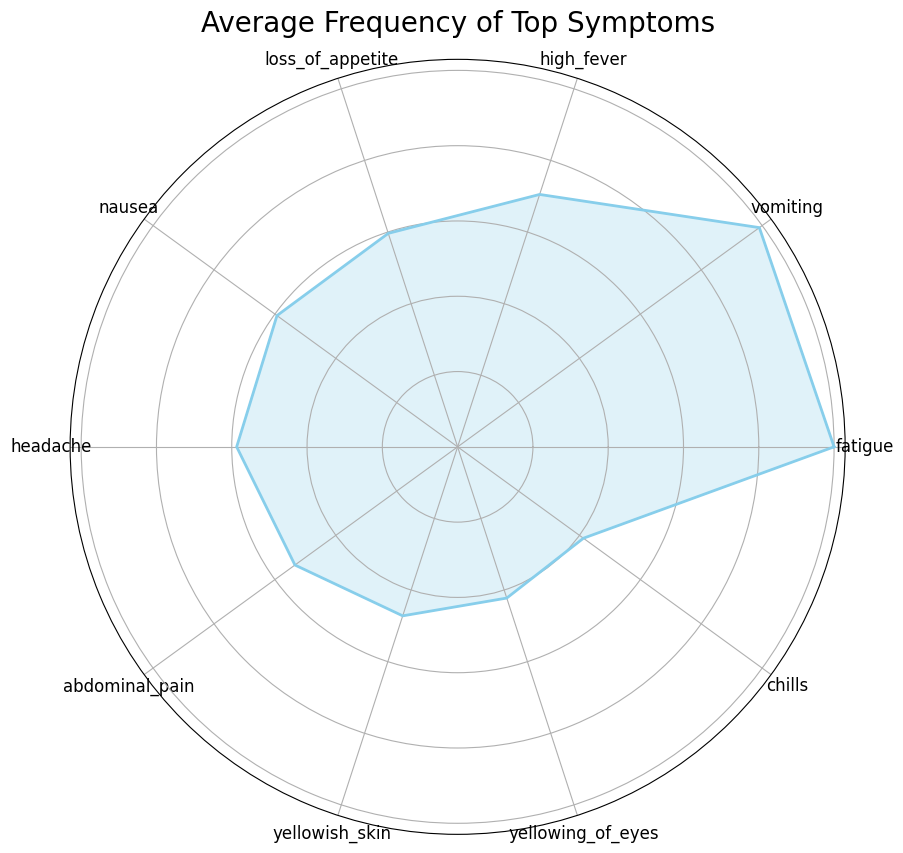

In [33]:
#Average Frequency of Top Symptoms
avg_freq = data_without_columns.mean()
avg_freq_sorted = avg_freq.sort_values(ascending=False)
num_axes = 10

top_symptoms = avg_freq_sorted[:num_axes]

max_value = top_symptoms.max()
normalized_data = top_symptoms / max_value

angles = np.linspace(0, 2 * np.pi, len(top_symptoms), endpoint=False).tolist()
values = normalized_data.tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 20), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.25)
ax.plot(angles, values, color='skyblue', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_symptoms.index, fontsize=12)

ax.set_title('Average Frequency of Top Symptoms', size=20, pad=20)

plt.show()

Hierarchy of Diseases and Symptoms

In [26]:
#Hierarchy of Diseases and Symptoms
import plotly.express as px

hierarchy_df = dff.groupby('Disease').sum().reset_index()
melted_df = hierarchy_df.melt(id_vars=['Disease'], var_name='Symptom', value_name='Frequency')

fig = px.sunburst(melted_df, path=['Disease', 'Symptom'], values='Frequency')
fig.update_layout(title='Hierarchy of Diseases and Symptoms')
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
<ipython-input-26-7af7f9d44694>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hierarch

Association Rules Network Graph

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



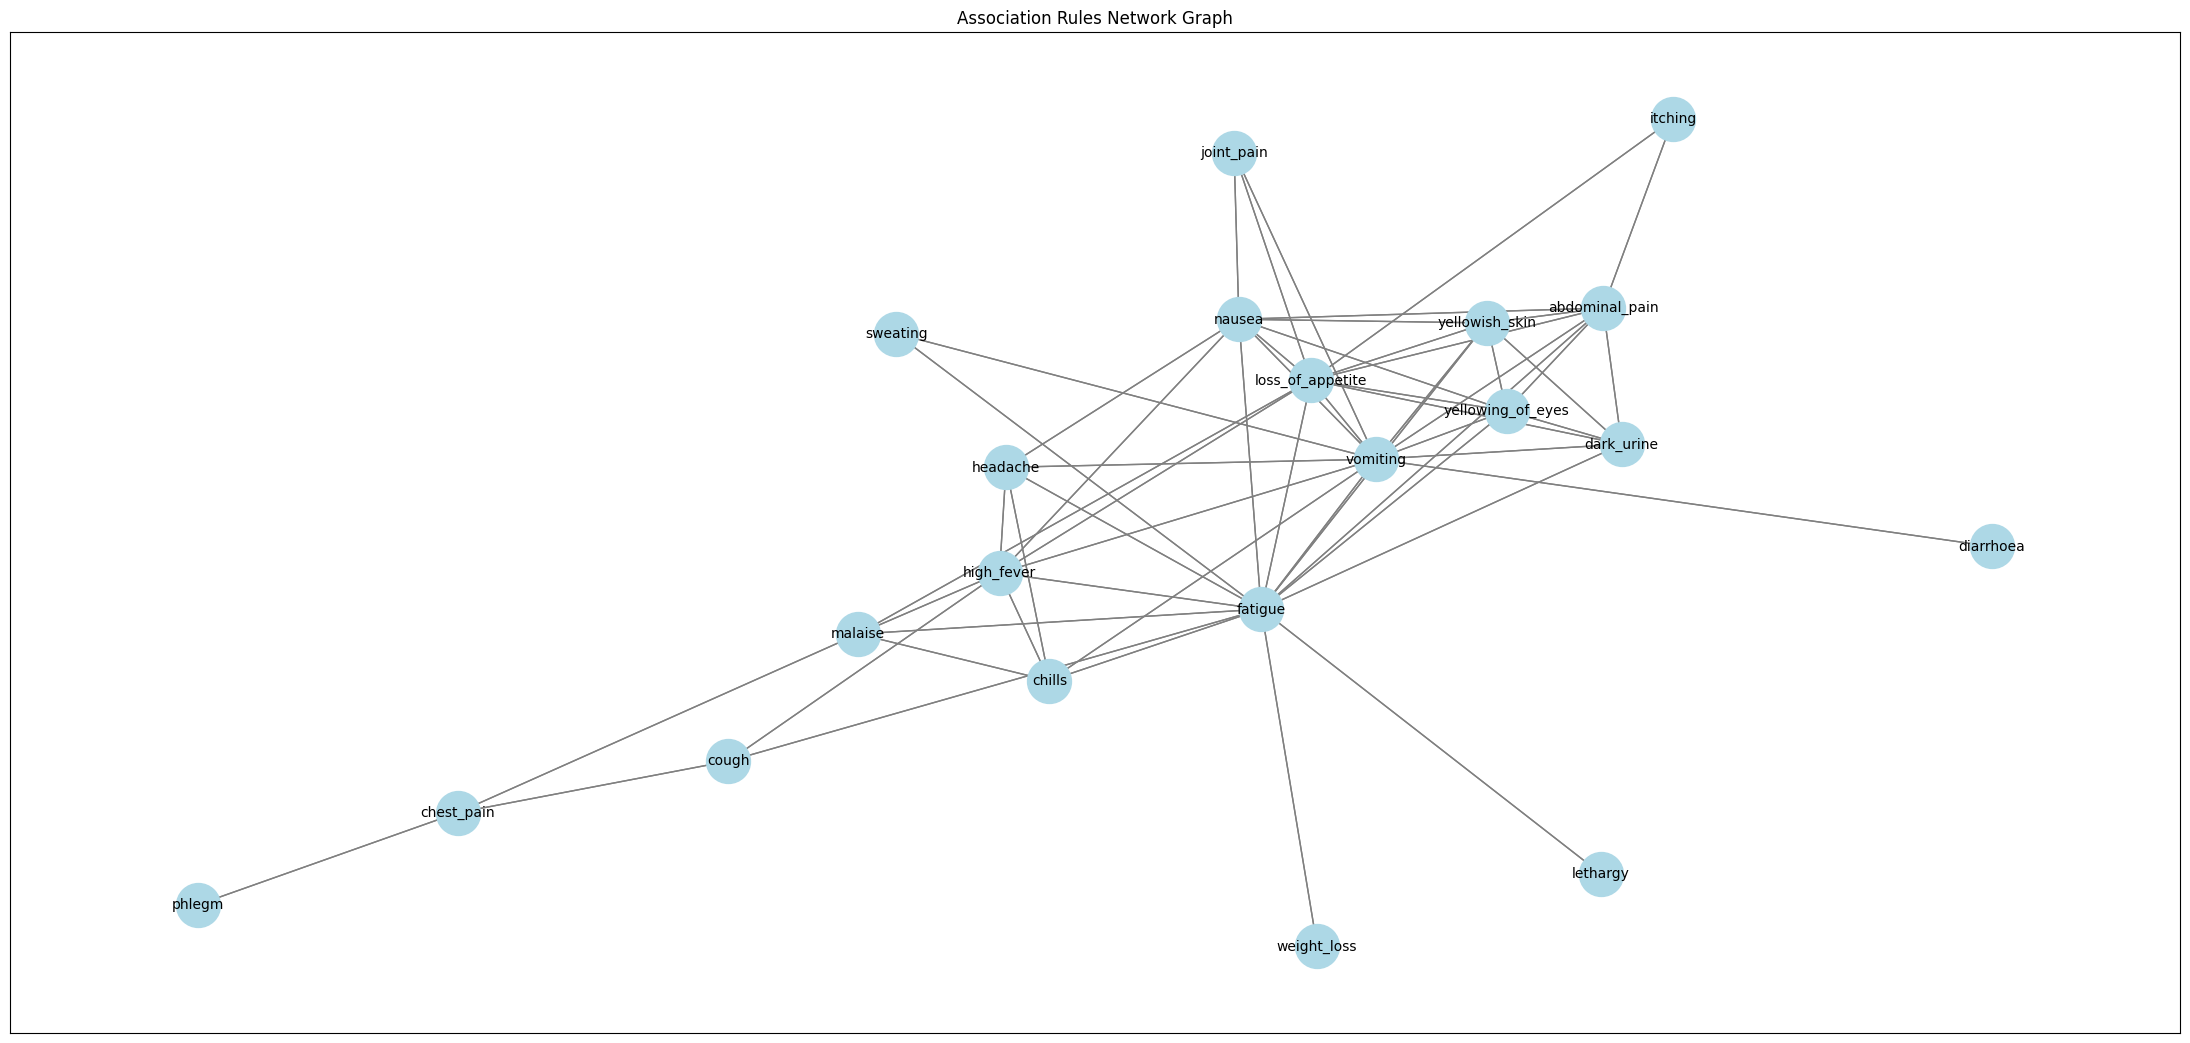

In [32]:
#Association Rules Network Graph
G = nx.DiGraph()

for idx, row in df_res.iterrows():
    G.add_edge(list(row['antecedents'])[0], list(row['consequents'])[0], weight=row['lift'])

plt.figure(figsize=(28, 13))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.title('Association Rules Network Graph')
plt.show()

#BY
#Menna Elminshawy
#Ahmed Wael
#Mariam Behairy
#Jana Soliman
#Radwa Belal
#Yassin Ehab

